In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Retail.csv")
print(data.head())
print(data.info())
print(data.describe())

  OrderNumber                     ProductName   Color    Category  \
0     SO43843         Mountain-100 Silver, 48  Silver       Bikes   
1     SO43843          Mountain-100 Black, 48   Black       Bikes   
2     SO43843  HL Mountain Frame - Silver, 46  Silver  Components   
3     SO43843          Mountain-100 Black, 44   Black       Bikes   
4     SO43843  HL Mountain Frame - Silver, 38  Silver  Components   

       Subcategory  ListPrice  Orderdate    Duedate  Shipdate PromotionName  \
0   Mountain Bikes  3399.9900  1/29/2011  2/10/2011  2/5/2011   No Discount   
1   Mountain Bikes  3374.9900  1/29/2011  2/10/2011  2/5/2011   No Discount   
2  Mountain Frames  1204.3248  1/29/2011  2/10/2011  2/5/2011   No Discount   
3   Mountain Bikes        NaN  1/29/2011  2/10/2011  2/5/2011   No Discount   
4  Mountain Frames  1204.3248  1/29/2011  2/10/2011  2/5/2011   No Discount   

  SalesRegion OrderQuantity  UnitPrice  SalesAmount  DiscountAmount  \
0     Central             2  2039.9940 

In [12]:
relevant_columns = ['SalesRegion', 'SalesAmount', 'Category', 'OrderQuantity']
sales_data = data[relevant_columns]
sales_by_region = sales_data.groupby('SalesRegion').agg({'SalesAmount': 'sum', 'OrderQuantity': 'sum'}).reset_index()
print(sales_by_region)

      SalesRegion   SalesAmount  \
0       Australia  8.609859e+05   
1          Canada  7.285031e+06   
2         Central  4.004239e+06   
3          France  2.582399e+06   
4         Germany  1.031465e+06   
5       Northeast  3.586784e+06   
6       Northwest  6.456252e+06   
7       Southeast  3.951639e+06   
8       Southwest  9.517869e+06   
9  United Kingdom  2.319464e+06   

                                       OrderQuantity  
0  3235331323313211212721219910378731476212615486...  
1  3111111111213131311211423222141321211221112313...  
2  222521Nan2231122111231423412253324213431010553...  
3  1142131113616438732117624632102108215428541410...  
4  2137135741231191942101326212642111033273124319...  
5  2113111311132251321211113233121322222121212221...  
6  1114221221141Nan211221111211111211222234212421...  
7  1312212214135219412224322426229241323413422214...  
8  1132111151224124112141412513333113212421112141...  
9  1261132213366312236261410242328484446338351376...  


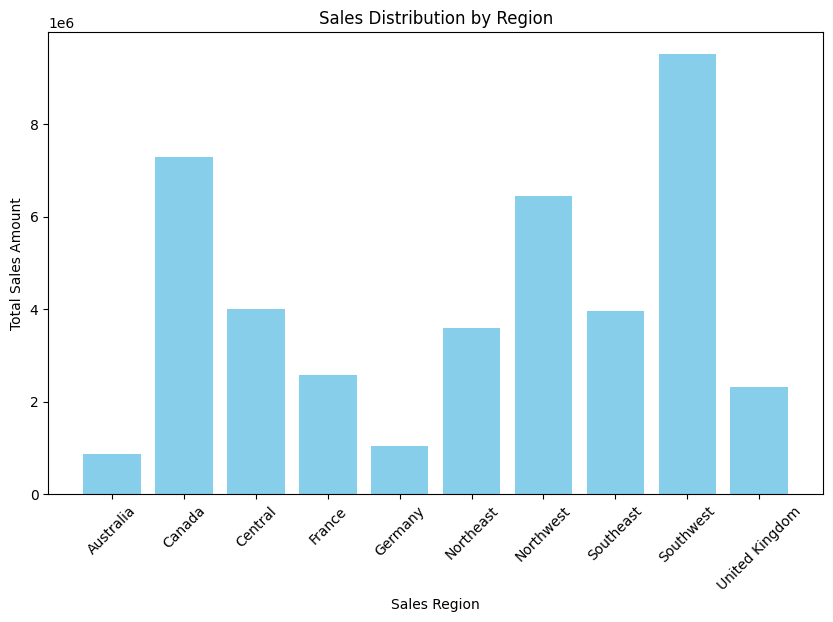

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_region['SalesRegion'], sales_by_region['SalesAmount'], color='skyblue')
plt.xlabel('Sales Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Distribution by Region')
plt.xticks(rotation=45)
plt.show()


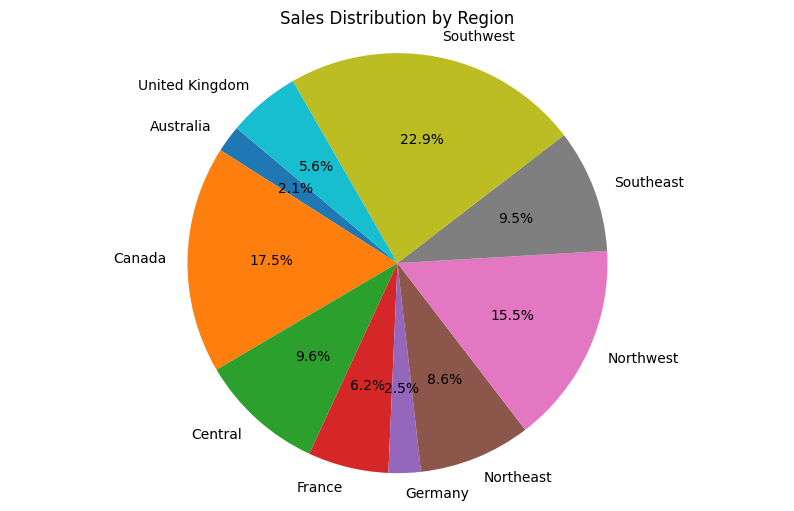

In [14]:
sales_by_region = sales_data.groupby('SalesRegion').agg({'SalesAmount': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.pie(sales_by_region['SalesAmount'], labels=sales_by_region['SalesRegion'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sales Distribution by Region')
plt.show()


In [8]:
top_regions = sales_by_region.sort_values(by='SalesAmount', ascending=False)
print(top_regions)

      SalesRegion   SalesAmount  \
8       Southwest  9.517869e+06   
1          Canada  7.285031e+06   
6       Northwest  6.456252e+06   
2         Central  4.004239e+06   
7       Southeast  3.951639e+06   
5       Northeast  3.586784e+06   
3          France  2.582399e+06   
9  United Kingdom  2.319464e+06   
4         Germany  1.031465e+06   
0       Australia  8.609859e+05   

                                       OrderQuantity  
8  1132111151224124112141412513333113212421112141...  
1  3111111111213131311211423222141321211221112313...  
6  1114221221141Nan211221111211111211222234212421...  
2  222521Nan2231122111231423412253324213431010553...  
7  1312212214135219412224322426229241323413422214...  
5  2113111311132251321211113233121322222121212221...  
3  1142131113616438732117624632102108215428541410...  
9  1261132213366312236261410242328484446338351376...  
4  2137135741231191942101326212642111033273124319...  
0  3235331323313211212721219910378731476212615486...  


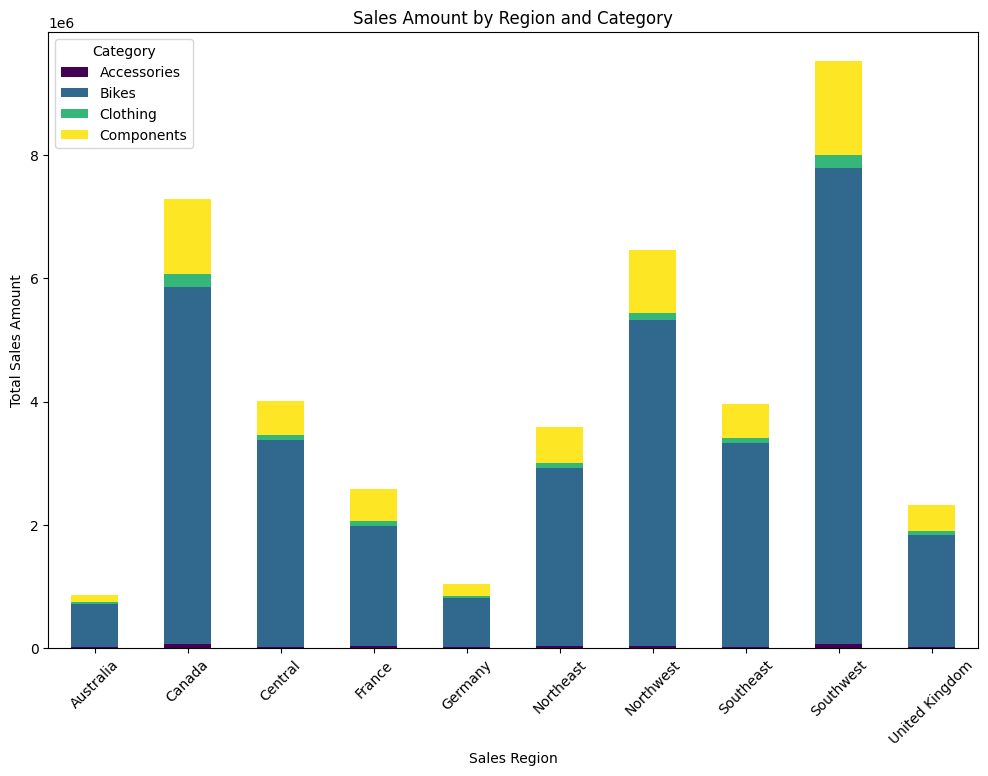

In [15]:
sales_by_region_category = sales_data.groupby(['SalesRegion', 'Category']).agg({'SalesAmount': 'sum'}).unstack().fillna(0)
sales_by_region_category.columns = sales_by_region_category.columns.droplevel()

sales_by_region_category.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('Sales Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Amount by Region and Category')
plt.xticks(rotation=45)
plt.show()
